# Frage: Was sind interessante Eigenschaften der Bücher?

In [44]:
import sys
sys.path.append("..")

from scripts.helper_funcs import get_encoding

In [45]:
loc = "../data/raw/bestsellers_with_categories.csv"
encoding = get_encoding(loc)
print(encoding)

utf-8


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Daten einlesen

In [47]:
data = pd.read_csv(loc, encoding=encoding)
df = pd.DataFrame(data)

In [48]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [50]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [51]:
df.duplicated("Name").sum()

np.int64(199)

In [52]:
df.duplicated(subset=["Name", "Author", "Year"]).sum()

np.int64(3)

In [53]:
df.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [54]:
df.shape

(550, 7)

# Den namen von sonderzeichen entfernen um zu schauen ob es doch die selben Bücher gibt nur leiocht unterschiedlich geschrieben

In [55]:
df["name_code"] = df["Name"].str.lower().str.replace(r"[^a-z0-9]", "")

In [56]:
df.duplicated("name_code").sum()

np.int64(200)

# Duplikate auf andere weise erkennen

In [57]:
df[df.duplicated(subset=["Author", "Year", "User Rating", "Reviews"], keep=False)]

,Name,Author,User Rating,Reviews,Price,Year,Genre,name_code
95,Eclipse (Twilight Sagas),Stephenie Meyer,4.7,5505,7,2009,Fiction,eclipse (twilight sagas)
96,Eclipse (Twilight),Stephenie Meyer,4.7,5505,18,2009,Fiction,eclipse (twilight)
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction,the fault in our stars
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction,the fault in our stars
404,The Help,Kathryn Stockett,4.8,13871,8,2011,Fiction,the help
405,The Help,Kathryn Stockett,4.8,13871,7,2011,Fiction,the help
518,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,13,2014,Non Fiction,"unbroken: a world war ii story of survival, re..."
519,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2014,Non Fiction,"unbroken: a world war ii story of survival, re..."


In [58]:
df_unique_names_per_year_df = df.groupby(["Author", "Year", "User Rating", "Reviews"], as_index=False).agg({"Name": "first", "Price": "mean", "Genre": "first"})
df_unique_names_per_year_df

,Author,Year,User Rating,Reviews,Name,Price,Genre
0,Abraham Verghese,2010,4.6,4866,Cutting for Stone,11.0,Fiction
1,Abraham Verghese,2011,4.6,4866,Cutting for Stone,11.0,Fiction
2,Adam Gasiewski,2017,4.4,3113,Milk and Vine: Inspirational Quotes From Class...,6.0,Non Fiction
3,Adam Mansbach,2011,4.8,9568,Go the F**k to Sleep,9.0,Fiction
4,Adir Levy,2019,4.8,8170,What Should Danny Do? (The Power to Choose Ser...,13.0,Fiction
...,...,...,...,...,...,...,...
541,Wizards RPG Team,2017,4.8,16990,Player's Handbook (Dungeons & Dragons),27.0,Fiction
542,Wizards RPG Team,2018,4.8,16990,Player's Handbook (Dungeons & Dragons),27.0,Fiction
543,Wizards RPG Team,2019,4.8,16990,Player's Handbook (Dungeons & Dragons),27.0,Fiction
544,Zhi Gang Sha,2009,4.6,37,Divine Soul Mind Body Healing and Transmission...,6.0,Non Fiction


# Preise überprüfen

In [59]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


# Es gibt bücher die kostenlos sind? Fehler?

In [60]:
df_unique_names_per_year_df[df_unique_names_per_year_df["Price"] == 0]

,Author,Year,User Rating,Reviews,Name,Price,Genre
9,Alice Schertle,2014,4.9,1884,Little Blue Truck,0.0,Fiction
118,Delegates of the Constitutional,2016,4.8,2774,The Constitution of the United States,0.0,Non Fiction
225,Harper Lee,2013,4.8,26234,To Kill a Mockingbird,0.0,Fiction
226,Harper Lee,2014,4.8,26234,To Kill a Mockingbird,0.0,Fiction
228,Harper Lee,2015,4.8,26234,To Kill a Mockingbird,0.0,Fiction
229,Harper Lee,2016,4.8,26234,To Kill a Mockingbird,0.0,Fiction
259,Jeff Kinney,2011,4.8,4505,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",0.0,Fiction
261,Jeff Kinney,2013,4.8,6812,"Diary of a Wimpy Kid: Hard Luck, Book 8",0.0,Fiction
265,Jeff Kinney,2017,4.8,5836,The Getaway,0.0,Fiction
387,RH Disney,2014,4.6,978,JOURNEY TO THE ICE P,0.0,Fiction


# Kostenlose identifizieren

In [61]:
free_books = df_unique_names_per_year_df[df_unique_names_per_year_df["Price"] == 0].drop(["Price", "Year"], axis=1)
free_books

,Author,User Rating,Reviews,Name,Genre
9,Alice Schertle,4.9,1884,Little Blue Truck,Fiction
118,Delegates of the Constitutional,4.8,2774,The Constitution of the United States,Non Fiction
225,Harper Lee,4.8,26234,To Kill a Mockingbird,Fiction
226,Harper Lee,4.8,26234,To Kill a Mockingbird,Fiction
228,Harper Lee,4.8,26234,To Kill a Mockingbird,Fiction
229,Harper Lee,4.8,26234,To Kill a Mockingbird,Fiction
259,Jeff Kinney,4.8,4505,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Fiction
261,Jeff Kinney,4.8,6812,"Diary of a Wimpy Kid: Hard Luck, Book 8",Fiction
265,Jeff Kinney,4.8,5836,The Getaway,Fiction
387,RH Disney,4.6,978,JOURNEY TO THE ICE P,Fiction


# In den original Daten nachschauen ob es Bücher gibt mit den gleiche Einträgen aber dass der Preis enthalten ist um diesen Preis auf die Einträge mit 0€ zu überschreiben, die restlichen bleiben bei 0€

In [62]:
df_unique_names_per_year_df.merge(free_books, how="right").drop_duplicates()

,Author,Year,User Rating,Reviews,Name,Price,Genre
0,Alice Schertle,2014,4.9,1884,Little Blue Truck,0.0,Fiction
1,Delegates of the Constitutional,2016,4.8,2774,The Constitution of the United States,0.0,Non Fiction
2,Harper Lee,2013,4.8,26234,To Kill a Mockingbird,0.0,Fiction
3,Harper Lee,2014,4.8,26234,To Kill a Mockingbird,0.0,Fiction
4,Harper Lee,2015,4.8,26234,To Kill a Mockingbird,0.0,Fiction
5,Harper Lee,2016,4.8,26234,To Kill a Mockingbird,0.0,Fiction
6,Harper Lee,2019,4.8,26234,To Kill a Mockingbird,7.0,Fiction
22,Jeff Kinney,2011,4.8,4505,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",0.0,Fiction
23,Jeff Kinney,2013,4.8,6812,"Diary of a Wimpy Kid: Hard Luck, Book 8",0.0,Fiction
24,Jeff Kinney,2017,4.8,5836,The Getaway,0.0,Fiction


# Alternative mit Masking

In [63]:
df_unique_names_per_year_df[df_unique_names_per_year_df["Name"].isin(free_books["Name"])]

,Author,Year,User Rating,Reviews,Name,Price,Genre
9,Alice Schertle,2014,4.9,1884,Little Blue Truck,0.0,Fiction
118,Delegates of the Constitutional,2016,4.8,2774,The Constitution of the United States,0.0,Non Fiction
225,Harper Lee,2013,4.8,26234,To Kill a Mockingbird,0.0,Fiction
226,Harper Lee,2014,4.8,26234,To Kill a Mockingbird,0.0,Fiction
228,Harper Lee,2015,4.8,26234,To Kill a Mockingbird,0.0,Fiction
229,Harper Lee,2016,4.8,26234,To Kill a Mockingbird,0.0,Fiction
230,Harper Lee,2019,4.8,26234,To Kill a Mockingbird,7.0,Fiction
259,Jeff Kinney,2011,4.8,4505,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",0.0,Fiction
261,Jeff Kinney,2013,4.8,6812,"Diary of a Wimpy Kid: Hard Luck, Book 8",0.0,Fiction
265,Jeff Kinney,2017,4.8,5836,The Getaway,0.0,Fiction


# Preisanpassung von Mocking Bird

In [71]:
df_unique_names_per_year_df.loc[df_unique_names_per_year_df["Name"] == "To Kill a Mockingbird", "Price"] = 7
df_unique_names_per_year_df[df_unique_names_per_year_df["Name"] == "To Kill a Mockingbird"]

,Author,Year,User Rating,Reviews,Name,Price,Genre
225,Harper Lee,2013,4.8,26234,To Kill a Mockingbird,7.0,Fiction
226,Harper Lee,2014,4.8,26234,To Kill a Mockingbird,7.0,Fiction
228,Harper Lee,2015,4.8,26234,To Kill a Mockingbird,7.0,Fiction
229,Harper Lee,2016,4.8,26234,To Kill a Mockingbird,7.0,Fiction
230,Harper Lee,2019,4.8,26234,To Kill a Mockingbird,7.0,Fiction


# Restliche Bücher mit einem Preis von 0€ entfernen

In [73]:
df_unique_names_per_year_df = df_unique_names_per_year_df[df_unique_names_per_year_df["Price"] != 0]
df_unique_names_per_year_df

,Author,Year,User Rating,Reviews,Name,Price,Genre
0,Abraham Verghese,2010,4.6,4866,Cutting for Stone,11.0,Fiction
1,Abraham Verghese,2011,4.6,4866,Cutting for Stone,11.0,Fiction
2,Adam Gasiewski,2017,4.4,3113,Milk and Vine: Inspirational Quotes From Class...,6.0,Non Fiction
3,Adam Mansbach,2011,4.8,9568,Go the F**k to Sleep,9.0,Fiction
4,Adir Levy,2019,4.8,8170,What Should Danny Do? (The Power to Choose Ser...,13.0,Fiction
...,...,...,...,...,...,...,...
541,Wizards RPG Team,2017,4.8,16990,Player's Handbook (Dungeons & Dragons),27.0,Fiction
542,Wizards RPG Team,2018,4.8,16990,Player's Handbook (Dungeons & Dragons),27.0,Fiction
543,Wizards RPG Team,2019,4.8,16990,Player's Handbook (Dungeons & Dragons),27.0,Fiction
544,Zhi Gang Sha,2009,4.6,37,Divine Soul Mind Body Healing and Transmission...,6.0,Non Fiction


In [65]:
df_unique_names_per_year_df.to_csv("../data/cleaned/cleaned_bestseller.csv", index=False)

# Hypothese: 
1. Ein hohes Review Rating ist sehr wichtig um ein Best Selling Book bei Amazon zu sein

2. Es ist gut viele reviews zu haben

In [66]:
px.pie(df, names="Genre")

<Axes: xlabel='Year', ylabel='Price'>

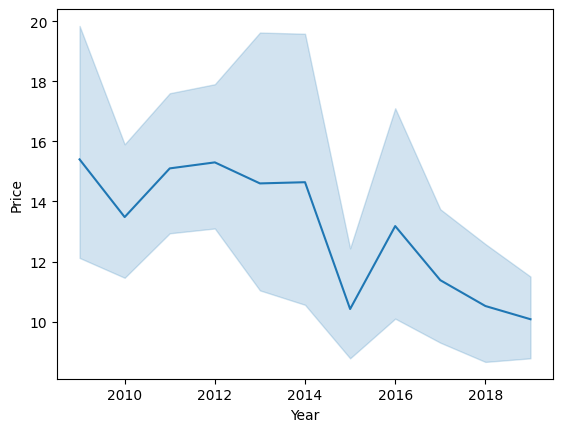

In [67]:
sns.lineplot(df, x="Year", y="Price")

In [68]:
rating_grouped = df.groupby(by="User Rating").agg({"Name": "count"}).reset_index()
rating_grouped

,User Rating,Name
0,3.3,1
1,3.6,1
2,3.8,2
3,3.9,3
4,4.0,14
5,4.1,6
6,4.2,8
7,4.3,25
8,4.4,38
9,4.5,60


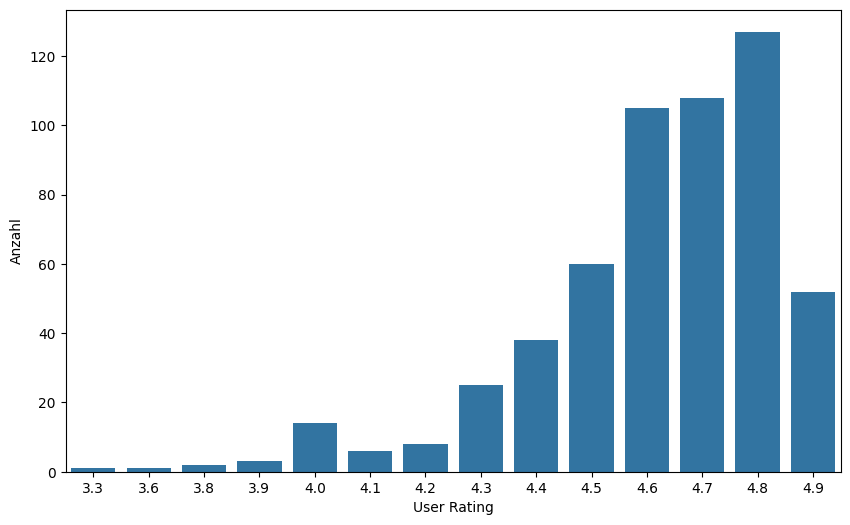

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(rating_grouped, x="User Rating", y="Name")
plt.ylabel("Anzahl")

plt.show()